## Checkpoint validation

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
checkpoint = torch.load("/work/ai4bio2024/rxrx1/checkpoints/simclr_backbone/checkpoint20")
training_loss_values = checkpoint['training_loss_values']
validation_loss_values = checkpoint['validation_loss_values']

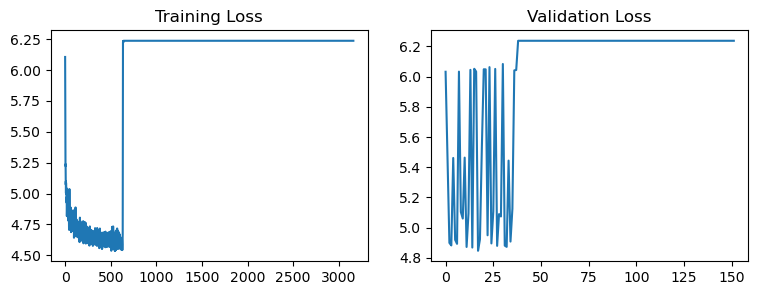

In [ ]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.title("Training Loss")
plt.plot(np.arange(len(training_loss_values)), training_loss_values)


plt.subplot(1, 2, 2)
plt.title("Validation Loss")
plt.plot(np.arange(len(validation_loss_values)), validation_loss_values)

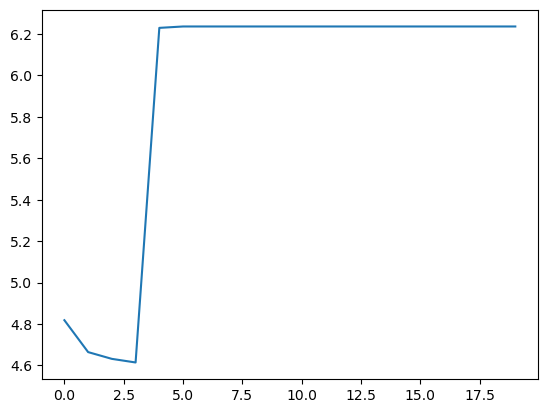

In [5]:
n_epochs = int(checkpoint['epoch'] + 1)
loss_values_per_epoch = len(training_loss_values) // n_epochs
training_loss_values = torch.asarray(training_loss_values)
mean_loss_value = torch.zeros(n_epochs)
for i in range(n_epochs):
    mean_loss_value[i] = (training_loss_values[i * loss_values_per_epoch: (i + 1)
                          * loss_values_per_epoch].sum()) / loss_values_per_epoch

plt.plot(torch.arange(n_epochs), mean_loss_value)
plt.show()

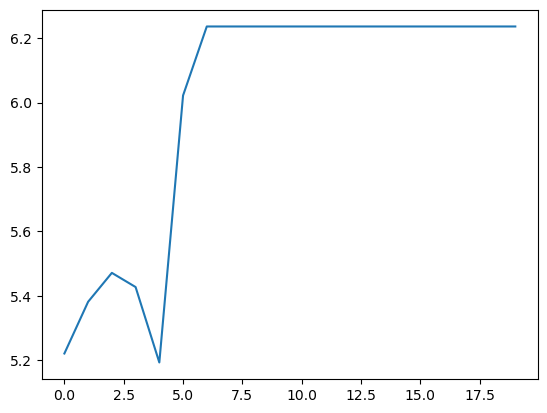

In [6]:
n_epochs = int(checkpoint['epoch'] + 1)
loss_values_per_epoch = len(validation_loss_values) // n_epochs
validation_loss_values = torch.asarray(validation_loss_values)
mean_loss_value = torch.zeros(n_epochs)
for i in range(n_epochs):
    mean_loss_value[i] = (validation_loss_values[i * loss_values_per_epoch: (i + 1)
                          * loss_values_per_epoch].sum()) / loss_values_per_epoch

plt.plot(torch.arange(n_epochs), mean_loss_value)
plt.show()

In [ ]:
from pathlib import Path
import os, torch
from torchvision.io import read_image
from torchvision.transforms.v2 import ToTensor, ToDtype
from wilds import get_dataset
from wilds.common.data_loaders import get_train_loader
import torchvision.transforms.v2 as transforms
from wilds.common.grouper import CombinatorialGrouper

dataset_dir = "/work/ai4bio2024/rxrx1"
imgs_dir = os.path.join(dataset_dir, "rxrx1_v1.0", "images")
to_float = ToDtype(torch.float, scale=True)

dataset = get_dataset(dataset="rxrx1", download=False, root_dir=dataset_dir)
grouper = CombinatorialGrouper(dataset, ['experiment'])

In [28]:
train_data = dataset.get_subset(
    "train",
    transform=transforms.Compose(
        [transforms.ToImage(), transforms.ToDtype(torch.float, scale=True)]
    ),
)
validation_data = dataset.get_subset(
    "val",
    transform=transforms.Compose(
        [transforms.ToImage(), transforms.ToDtype(torch.float, scale=True)]
    ),
)
train_loader = get_train_loader("group", train_data, grouper=grouper, n_groups_per_batch=1,
                                batch_size=256, pin_memory_device='cuda:0', pin_memory=True, num_workers=8,
                                prefetch_factor=2, persistent_workers=True)
validation_loader = get_train_loader("group", train_data, grouper=grouper, n_groups_per_batch=1,
                                batch_size=256, pin_memory_device='cuda:0', pin_memory=True, num_workers=8,
                                prefetch_factor=2, persistent_workers=True)

In [21]:
for x, y, metadata in train_loader:
    print(metadata)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/usr/local/anaconda3/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/usr/local/anaconda3/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 